In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [2]:
# setting styles for plotting
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams['image.cmap'] = 'bone'
sns.set_palette('bone')
sns.color_palette('bone')
sns.set_style('whitegrid')
sns.set_context('poster')

In [3]:
deaths = pd.read_csv('mort2016.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (63,66,69,72,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
deaths.shape

(2749864, 116)

In [5]:
deaths.columns

Index(['restatus', 'educ1989', 'educ2003', 'educflag', 'monthdth', 'sex',
       'age', 'ageflag', 'ager52', 'ager27',
       ...
       'record_18', 'record_19', 'record_20', 'race', 'brace', 'raceimp',
       'racer3', 'racer5', 'hispanic', 'hspanicr'],
      dtype='object', length=116)

In [6]:
deaths.head()

,restatus,educ1989,educ2003,educflag,monthdth,sex,age,ageflag,ager52,ager27,...,record_18,record_19,record_20,race,brace,raceimp,racer3,racer5,hispanic,hspanicr
0,1,NaN,3.0,1,1,M,1079,NaN,41,21,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,4.0,1,1,M,1088,NaN,43,23,...,NaN,NaN,NaN,1,1.0,NaN,1,1,100,6
2,1,NaN,1.0,1,1,M,1059,NaN,37,17,...,NaN,NaN,NaN,1,NaN,2.0,1,1,210,1
3,1,NaN,5.0,1,1,M,1057,NaN,37,17,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
4,1,NaN,6.0,1,1,M,1082,NaN,42,22,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [7]:
deaths.restatus.value_counts()

1    2216688
2     441751
3      85809
4       5616
Name: restatus, dtype: int64

### Resident Status
1 = RESIDENTS

State and County of Occurrence and Residence are the same.

2 = INTRASTATE NONRESIDENTS

State of Occurrence and Residence are the same, but County is
different.

3 = INTERSTATE NONRESIDENTS

State of Occurrence and Residence are different, but both are in the U.S.

4 = FOREIGN RESIDENTS

State of Occurrence is one of the 50 States or the District of Columbia, but Place of Residence is outside of the U.S. 

In [8]:
deaths.rename(columns={'restatus':'residentstatus'}, inplace=True)
deaths.head()

,residentstatus,educ1989,educ2003,educflag,monthdth,sex,age,ageflag,ager52,ager27,...,record_18,record_19,record_20,race,brace,raceimp,racer3,racer5,hispanic,hspanicr
0,1,NaN,3.0,1,1,M,1079,NaN,41,21,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,4.0,1,1,M,1088,NaN,43,23,...,NaN,NaN,NaN,1,1.0,NaN,1,1,100,6
2,1,NaN,1.0,1,1,M,1059,NaN,37,17,...,NaN,NaN,NaN,1,NaN,2.0,1,1,210,1
3,1,NaN,5.0,1,1,M,1057,NaN,37,17,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
4,1,NaN,6.0,1,1,M,1082,NaN,42,22,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


### Education

#### educ1989 = Education 1989 revision

 - 00 ... No formal education
 - 01-08 ... Years of elementary school
 - 09 ... 1 year of high school
 - 10 ... 2 years of high school
 - 11 ... 3 years of high school
 - 12 ... 4 years of high school
 - 13 ... 1 year of college
 - 14 ... 2 years of college
 - 15 ... 3 years of college
 - 16 ... 4 years of college
 - 17 ... 5 or more years of college
 - 99 ... Not stated 

#### educ2003 = Education 2003 revision

Field is blank for registration areas that are using the 1989 revision format of the item.
 - 1 ... 8th grade or less
 - 2 ... 9 - 12th grade, no diploma
 - 3 ... high school graduate or GED completed
 - 4 ... some college credit, but no degree
 - 5 ... Associate degree
 - 6 ... Bachelor’s degree
 - 7 ... Master’s degree
 - 8 ... Doctorate or professional degree
 - 9 ... Unknown 

#### educflag = Education reporting flag

 - 0 ... 1989 revision of education item on certificate
 - 1 ... 2003 revision of education item on certificate
 - 2 ... no education item on certificate 

In [9]:
## everyone has education on file
deaths.educflag.value_counts()

1    2727874
0      21990
Name: educflag, dtype: int64

In [10]:
deaths.head()

,residentstatus,educ1989,educ2003,educflag,monthdth,sex,age,ageflag,ager52,ager27,...,record_18,record_19,record_20,race,brace,raceimp,racer3,racer5,hispanic,hspanicr
0,1,NaN,3.0,1,1,M,1079,NaN,41,21,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,4.0,1,1,M,1088,NaN,43,23,...,NaN,NaN,NaN,1,1.0,NaN,1,1,100,6
2,1,NaN,1.0,1,1,M,1059,NaN,37,17,...,NaN,NaN,NaN,1,NaN,2.0,1,1,210,1
3,1,NaN,5.0,1,1,M,1057,NaN,37,17,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
4,1,NaN,6.0,1,1,M,1082,NaN,42,22,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


### Age

#### age = detailed age
 - Can be listed in minutes through years.
 - Value of 9 = Age not stated
 - We'll have to determine how each row was reported.
 
#### ageflag = age substitution flag
  - 1 = Age calculated from dates of birth and death as reported age was unknown
  - NaN = Reported age used.
  
#### Age Recodes
 - Bins of age groups
 - Number of groups = 52 27 and 12
 - Also infant age recode column

#### Age Recode 12
01 ... Under 1 year (includes not stated infant ages)</br>

02 ... 1 - 4 years</br>

03 ... 5 - 14 years</br>

04 ... 15 - 24 years</br>

05 ... 25 - 34 years</br>

06 ... 35 - 44 years</br>

07 ... 45 - 54 years</br>

08 ... 55 - 64 years</br>

09 ... 65 - 74 years</br>

10 ... 75 - 84 years</br>

11 ... 85 years and over</br>

12 ... Age not stated</br> 

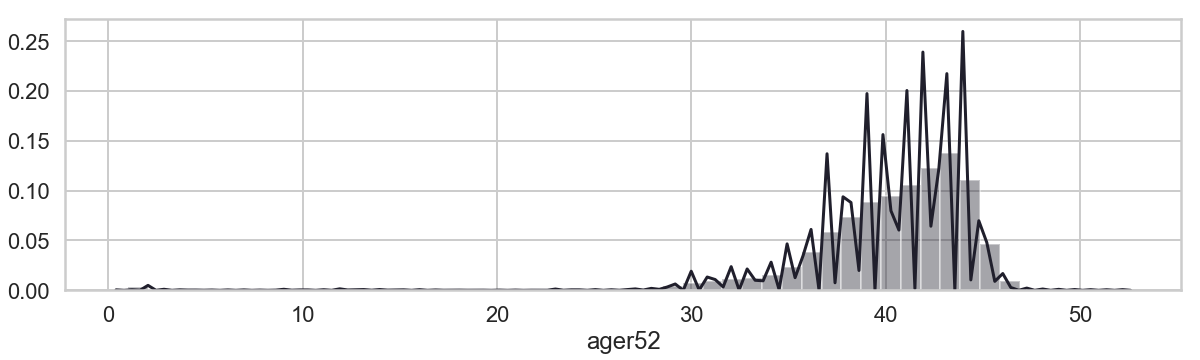

In [38]:
sns.distplot(deaths.ager52);

In [13]:
deaths.ageflag.value_counts()

1.0    6
Name: ageflag, dtype: int64

In [14]:
## dropping ageflag column since only 6 values in the entire column
deaths = deaths.drop(columns='ageflag')

In [15]:
## dropping ager22 column since we aren't especially concerned with infant deaths
deaths = deaths.drop(columns='ager22')

#### placdth = place of death and decedent's status

1 ... Hospital, clinic or Medical Center - Inpatient  
2 ... Hospital, Clinic or Medical Center - Outpatient or admitted to Emergency Room  
3 ... Hospital, Clinic or Medical Center - Dead on Arrival  
4 ... Decedent’s home  
5 ... Hospice facility  
6 ... Nursing home/long term care  
7 ... Other  
9 ... Place of death unknown   

#### marstat = Marital Status

S ... Never married, single M... Married  
W ... Widowed  
D ... Divorced  
U ... Marital Status unknown   

#### weekday = day of week of death
1 ... Sunday  
2 ... Monday  
3 ... Tuesday  
4 ... Wednesday  
5 ... Thursday  
6 ... Friday  
7 ... Saturday  
9 ... Unknown   

#### injwork = Injury at work
Y ... Yes  
N ... No  
U ... Unknown   

#### Manner of Death
1 ... Accident  
2 ... Suicide  
3 ... Homicide  
4 ... Pending investigation  
5 ... Could not determine  
6 ... Self-Inflicted  
7 ... Natural  
Blank ... Not specified => changed to zero

In [16]:
deaths.iloc[:,10:30].head()

,placdth,marstat,weekday,year,injwork,mandeath,methdisp,autopsy,activity,injury,ucod,ucr358,ucr113,ucr130,ucr39,eanum,econdp_1,econds_1,enicon_1,econdp_2
0,1,D,7,2016,U,7.0,C,N,NaN,NaN,K566,293,111,NaN,37,4,1,1,J960,2.0
1,1,W,6,2016,U,7.0,C,N,NaN,NaN,I64,238,70,NaN,24,4,1,1,I64,2.0
2,6,M,7,2016,U,7.0,C,N,NaN,NaN,C189,81,23,NaN,6,1,1,1,C189,NaN
3,4,M,6,2016,U,7.0,B,N,NaN,NaN,K767,301,111,NaN,37,2,1,1,K769,2.0
4,1,M,2,2016,U,7.0,C,N,NaN,NaN,E785,173,111,NaN,37,3,1,1,I469,2.0


In [17]:
deaths = deaths.drop(columns='year')

In [18]:
## checking nulls in mandeath
deaths.mandeath.isnull().sum()

294239

In [19]:
## changing nulls to zero
deaths.mandeath.replace(np.nan, 0, inplace=True)

#### Method of Disposition
B ... Burial
C ... Cremation
D ... Other
U ... Unknown

#### Autopsy
Y ... Yes
N ... No
U ... Unknown 

#### Activity Code
0 ... While engaged in sports activity
1 ... While engaged in leisure activity
2 ... While working for income
3 ... While engaged in other types of work
4 ... While resting, sleeping, eating (vital activities)
8 ... While engaged in other specified activities
9 ... During unspecified activity
Blank ... Not applicable 

In [20]:
## checking nulls in activity code
deaths.activity.isnull().sum()

2518426

In [21]:
## changing nulls to 99
deaths.activity.replace(np.nan, 99, inplace=True)

#### Place of Injury for Causes W00-Y34, except Y06.- and Y07.-
0 ... Home  
1 ... Residential institution  
2 ... School, other institution and public administrative area  
3 ... Sports and athletics area  
4 ... Street and highway  
5 ... Trade and service area  
6 ... Industrial and construction area  
7 ... Farm  
8 ... Other Specified Places  
9 ... Unspecified place  
Blank ... Causes other than W00-Y34, except Y06.- and Y07.-  

In [22]:
deaths.injury.value_counts(dropna=False)

NaN     2525785
 9.0     136649
 0.0      61930
 8.0       9721
 1.0       5292
 4.0       4482
 5.0       3844
 2.0        997
 6.0        638
 7.0        345
 3.0        181
Name: injury, dtype: int64

In [23]:
## changing nulls to 99
deaths.injury.replace(np.nan, 99, inplace=True)

In [24]:
deaths.iloc[:,20:40].head()

,ucr358,ucr113,ucr130,ucr39,eanum,econdp_1,econds_1,enicon_1,econdp_2,econds_2,enicon_2,econdp_3,econds_3,enicon_3,econdp_4,econds_4,enicon_4,econdp_5,econds_5,enicon_5
0,293,111,NaN,37,4,1,1,J960,2.0,1.0,J958,3.0,1.0,Y838,4.0,1.0,K566,NaN,NaN,NaN
1,238,70,NaN,24,4,1,1,I64,2.0,1.0,I709,6.0,1.0,J449,6.0,2.0,F179,NaN,NaN,NaN
2,81,23,NaN,6,1,1,1,C189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,301,111,NaN,37,2,1,1,K769,2.0,1.0,K767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,173,111,NaN,37,3,1,1,I469,2.0,1.0,I251,3.0,1.0,E785,NaN,NaN,NaN,NaN,NaN,NaN


### Underlying Cause of Death
&nbsp;

#### ucode = ICD10 code
&nbsp;

#### ucr_n   
A recode of the ICD cause code into 358 113 or 39 groups or 130 infant groups
&nbsp;

#### eanum = number of entity-axis conditions
&nbsp;

The ICD considers a death to be a drug overdose death if any one of the following ICD-10 codes, indicating poisoning by drugs, medicaments, and biological substances, is in the underlying cause of death: X40–X44 (unintentional), X60–X64 (suicide), X85 (assault), and Y10–Y14 (undetermined intent). ICD-10 allows for the identification of specific drug classes in overdoses by the ICD-10 codes T36–T50, “Poisoning by drugs, medicaments, and biological substances.”

In [25]:
## dropping infant cause recode
deaths = deaths.drop(columns='ucr130')

In [26]:
deaths.iloc[:,20:40].head()

,ucr358,ucr113,ucr39,eanum,econdp_1,econds_1,enicon_1,econdp_2,econds_2,enicon_2,econdp_3,econds_3,enicon_3,econdp_4,econds_4,enicon_4,econdp_5,econds_5,enicon_5,econdp_6
0,293,111,37,4,1,1,J960,2.0,1.0,J958,3.0,1.0,Y838,4.0,1.0,K566,NaN,NaN,NaN,NaN
1,238,70,24,4,1,1,I64,2.0,1.0,I709,6.0,1.0,J449,6.0,2.0,F179,NaN,NaN,NaN,NaN
2,81,23,6,1,1,1,C189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,301,111,37,2,1,1,K769,2.0,1.0,K767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,173,111,37,3,1,1,I469,2.0,1.0,I251,3.0,1.0,E785,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
## dropping unneeded cause of death columns
deaths = deaths.drop(['econdp_1', 'econds_1', 'econdp_2', 'econds_2', 'econdp_3', 'econds_3', 'econdp_4',
                     'econds_4', 'econdp_5', 'econds_5'], axis=1)

In [28]:
deaths.iloc[:,30:50].head()

,econds_6,enicon_6,econdp_7,econds_7,enicon_7,econdp_8,econds_8,enicon_8,econdp_9,econds_9,enicon_9,econdp_10,econds_10,enicon_10,econdp_11,econds_11,enicon_11,econdp_12,econds_12,enicon_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
deaths.eanum.unique()

array([ 4,  1,  2,  3,  5,  7,  6, 11,  8,  9, 13, 10, 12, 14, 15])

In [30]:
## lets just check missing values for the whole dataframe here
# from https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb# from  # from  
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(deaths).head(10)

Your selected dataframe has 102 columns.
There are 72 columns that have missing values.


,Missing Values,% of Total Values
econdp_16,2749864,100.0
enicon_20,2749864,100.0
econds_17,2749864,100.0
econdp_17,2749864,100.0
enicon_16,2749864,100.0
econds_16,2749864,100.0
econds_18,2749864,100.0
econdp_18,2749864,100.0
enicon_18,2749864,100.0
econdp_19,2749864,100.0


In [39]:
def drop_missing_values(df, percent_drop):
    
    to_drop = [column for column in df if (df[column].isnull().sum()/len(df) >= percent_drop)]

    print('Columns to drop: ' , (len(to_drop)))
    # Drop features 
    df = df.drop(columns=to_drop)
    print('Shape: ', df.shape)
    return df

deaths = drop_missing_values(deaths, .999)

Columns to drop:  13
Shape:  (2749864, 69)


In [41]:
missing_values_table(deaths).head(10)

Your selected dataframe has 69 columns.
There are 37 columns that have missing values.


,Missing Values,% of Total Values
enicon_12,2743901,99.8
econds_12,2743901,99.8
econdp_12,2743901,99.8
record_11,2743212,99.8
econdp_11,2737429,99.5
enicon_11,2737429,99.5
econds_11,2737429,99.5
record_10,2734659,99.4
educ1989,2727874,99.2
econdp_10,2724885,99.1


### Record-Axis Conditions

&nbsp;

#### ranum = Number of record-axis positions  

&nbsp;

#### record_n
Allowed space for up to 20 record-axis conditions.  

In [34]:
## no one has more than 15 record-axis conditions
deaths.ranum.unique()

array([ 4,  1,  3,  2,  5,  7,  6, 11,  8,  9, 10, 12, 14, 13, 15])

### Race  

  &nbsp;
  
#### race

01 ... White

02 ... Black

03 ... American Indian (includes Aleuts and Eskimos)

04 ... Chinese

05 ... Japanese

06 ... Hawaiian (includes Part-Hawaiian)

07 ... Filipino

18 ... Asian Indian

28 ... Korean

38 ... Samoan

48 ... Vietnamese

58 ... Guamanian

68 ... Other Asian or Pacific Islander in areas reporting codes 18-58

78 ... Combined other Asian or Pacific Islander, includes codes 18-68 for
areas that do not report them separately

&nbsp;
 
#### brace = bridgedrace


According to https://www.cdc.gov/nchs/nvss/bridged_race.htm race bridging is a method used to make multiple-race and single-race data collection systems sufficiently comparable to permit estimation and analysis of race-specific statistics.
  

1 = Bridged

0 = Not Bridged

&nbsp;

#### raceimp = raceimputed
0 = Not imputed

1 = Unknown race is imputed

2 = All other races is imputed

&nbsp;

#### racer3 = Race Recode 3
1 ... White

2 ... Races other than White or Black

3 ... Black

&nbsp;

#### racer5 =  Race Recode 5
0 … Other (Puerto Rico only)

1 ... White

2 ... Black

3 ... American Indian

4 ... Asian or Pacific Islander

&nbsp;

#### Hispanic Origin = hispanic
100-199 ... Non-Hispanic  
200-209 … Spaniard 210-  
219 ... Mexican  
260-269 ... Puerto Rican  
270-274 ... Cuban  
275-279 … Dominican  
220 … Central and South American  
221-230 ... Central American  
231-249 … South American  
250-259 … Latin American  
280-299 ... Other Hispanic  
996-999 ... Unknown  

&nbsp;

#### Hispanic Origin/Race Recode = racerecode  
1 ... Mexican  
2 ... Puerto Rican  
3 ... Cuban  
4 ... Central or South American  
5 ... Other or unknown Hispanic  
6 ... Non - Hispanic white  
7 ... Non - Hispanic black  
8 ... Non - Hispanic other races  
9 ... Hispanic origin unknown   

In [36]:
deaths.rename(columns={'hspanicr':'racerecode',
                      'brace':'bridgedrace'}, inplace=True)

In [37]:
## replace nan with 0 for race columns
deaths.bridgedrace.replace(np.nan, 0, inplace=True)
deaths.raceimp.replace(np.nan, 0, inplace=True)

### Drilling Down into Cause of Death

Now that we've done some basic cleaning its time to focus in on the causes of death we're interested in: Opioid Overdoses.   
&nbsp;

Deaths are classified using ICD–10 codes. Drug-poisoning deaths are identified using underlying cause-of-death codes X40–X44, X60–X64, X85, and Y10–Y14.

In [42]:
deaths.head()

,residentstatus,educ1989,educ2003,educflag,monthdth,sex,age,ager52,ager27,ager12,...,record_9,record_10,record_11,race,bridgedrace,raceimp,racer3,racer5,hispanic,racerecode
0,1,NaN,3.0,1,1,M,1079,41,21,10,...,NaN,NaN,NaN,1,0.0,0.0,1,1,100,6
1,1,NaN,4.0,1,1,M,1088,43,23,11,...,NaN,NaN,NaN,1,1.0,0.0,1,1,100,6
2,1,NaN,1.0,1,1,M,1059,37,17,8,...,NaN,NaN,NaN,1,0.0,2.0,1,1,210,1
3,1,NaN,5.0,1,1,M,1057,37,17,8,...,NaN,NaN,NaN,1,0.0,0.0,1,1,100,6
4,1,NaN,6.0,1,1,M,1082,42,22,10,...,NaN,NaN,NaN,1,0.0,0.0,1,1,100,6


In [ ]:

deaths.loc[deaths.]